# Import statements

In [100]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Load in the data

In [101]:
df=pd.read_csv("/content/8f2971f0-7a0d-401d-8376-0289e3b810ba.csv")

# Check stats

In [102]:
df.head()

,_id,Cabinet,Dept,Program,Expense Category,FY22 Actual Expense,FY23 Actual Expense,FY24 Appropriation,FY25 Budget
0,1,Mayor's Cabinet,Mayor's Office,Mayor's Administration,Personnel Services,1624903.69,2374448.36,1921403.81,2217748.39
1,2,Mayor's Cabinet,Mayor's Office,Mayor's Administration,Contractual Services,284597.9,383743.11,219633.42,234628
2,3,Mayor's Cabinet,Mayor's Office,Mayor's Administration,Supplies & Materials,28541.55,74491.63,55573.65,60000
3,4,Mayor's Cabinet,Mayor's Office,Mayor's Administration,Current Charges & Obligations,19410.3,25350.83,16734.29,20000
4,5,Mayor's Cabinet,Mayor's Office,Mayor's Administration,Equipment,16164.36,44132.61,36115,53000


In [103]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 943 entries, 0 to 942
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   _id                  943 non-null    int64 
 1   Cabinet              943 non-null    object
 2   Dept                 943 non-null    object
 3   Program              943 non-null    object
 4   Expense Category     943 non-null    object
 5   FY22 Actual Expense  943 non-null    object
 6   FY23 Actual Expense  943 non-null    object
 7   FY24 Appropriation   943 non-null    object
 8   FY25 Budget          943 non-null    object
dtypes: int64(1), object(8)
memory usage: 66.4+ KB


In [104]:
df.describe()

,_id
count,943.000000
mean,472.000000
std,272.364951
min,1.000000
25%,236.500000
50%,472.000000
75%,707.500000
max,943.000000


In [105]:
df.columns

Index(['_id', 'Cabinet', 'Dept', 'Program', 'Expense Category',
       'FY22 Actual Expense', 'FY23 Actual Expense', 'FY24 Appropriation',
       'FY25 Budget'],
      dtype='object')

# Mark missing values as Empty and convert columns to numerical

In [106]:
for item in ['FY22 Actual Expense', 'FY23 Actual Expense', 'FY24 Appropriation',
       'FY25 Budget']:
       df[item]=df[item].replace("#Missing",None)



for item in ['FY22 Actual Expense', 'FY23 Actual Expense', 'FY24 Appropriation',
       'FY25 Budget']:
       df[item]=df[item].astype("float")

# Revisit the stats

In [107]:
##We can now truly see the number of empty values in the dataframe.

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 943 entries, 0 to 942
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   _id                  943 non-null    int64  
 1   Cabinet              943 non-null    object 
 2   Dept                 943 non-null    object 
 3   Program              943 non-null    object 
 4   Expense Category     943 non-null    object 
 5   FY22 Actual Expense  760 non-null    float64
 6   FY23 Actual Expense  805 non-null    float64
 7   FY24 Appropriation   814 non-null    float64
 8   FY25 Budget          849 non-null    float64
dtypes: float64(4), int64(1), object(4)
memory usage: 66.4+ KB


In [108]:
df.describe()

,_id,FY22 Actual Expense,FY23 Actual Expense,FY24 Appropriation,FY25 Budget
count,943.000000,7.600000e+02,8.050000e+02,8.140000e+02,8.490000e+02
mean,472.000000,5.050831e+06,5.043092e+06,5.272929e+06,5.461631e+06
std,272.364951,2.644391e+07,2.759531e+07,2.880509e+07,2.999222e+07
min,1.000000,0.000000e+00,-2.473027e+05,0.000000e+00,0.000000e+00
25%,236.500000,9.230095e+03,1.180132e+04,1.410000e+04,1.314300e+04
50%,472.000000,1.348468e+05,1.323754e+05,1.738315e+05,1.572500e+05
75%,707.500000,8.786529e+05,9.508319e+05,1.017907e+06,1.104468e+06
max,943.000000,3.236842e+08,3.819187e+08,3.905964e+08,4.224943e+08


In [109]:
df.head()

,_id,Cabinet,Dept,Program,Expense Category,FY22 Actual Expense,FY23 Actual Expense,FY24 Appropriation,FY25 Budget
0,1,Mayor's Cabinet,Mayor's Office,Mayor's Administration,Personnel Services,1624903.69,2374448.36,1921403.81,2217748.39
1,2,Mayor's Cabinet,Mayor's Office,Mayor's Administration,Contractual Services,284597.90,383743.11,219633.42,234628.00
2,3,Mayor's Cabinet,Mayor's Office,Mayor's Administration,Supplies & Materials,28541.55,74491.63,55573.65,60000.00
3,4,Mayor's Cabinet,Mayor's Office,Mayor's Administration,Current Charges & Obligations,19410.30,25350.83,16734.29,20000.00
4,5,Mayor's Cabinet,Mayor's Office,Mayor's Administration,Equipment,16164.36,44132.61,36115.00,53000.00


# Filtering on Police Department and handling Empty values

In [110]:
#Fetch all numerical columns

numerical=[]
categorical=[]
for item in df.columns:
  if df[item].dtype!="object":
    numerical.append(item)
  else:
    categorical.append(item)

In [111]:
df=df[df["Dept"]=="Police Department"]

In [112]:
df.dropna(inplace=True)

# Identifying Outliers in the data

In [113]:
df.columns

Index(['_id', 'Cabinet', 'Dept', 'Program', 'Expense Category',
       'FY22 Actual Expense', 'FY23 Actual Expense', 'FY24 Appropriation',
       'FY25 Budget'],
      dtype='object')

In [114]:
#Lets use the IQR strategy to detect the outliers
outlierAnalysis=[]
for item in df.columns:
  if df[item].dtype!="object" and item!="_id":
    percentile_1=np.percentile(df[item],25)
    percentile_2=np.percentile(df[item],75)
    print(percentile_2,percentile_1)
    iqr=percentile_2-percentile_1
    outlier_min=percentile_1-(1.5*iqr)
    outlier_max=percentile_2+(1.5*iqr)
    print(outlier_max,outlier_min)
    df[(df[item]>outlier_max) | (df[item]<outlier_min)]
    outlierAnalysis.append([item,df[(df[item]>outlier_max) | (df[item]<outlier_min)].shape[0]])

4432215.9399999995 66036.535
10981485.0475 -6483232.572499999
4308277.03 90646.5
10634722.825 -6235799.295
4525699.5 91063.0
11177654.25 -6560891.75
4519478.275 70925.0
11192308.1875 -6601904.912500001


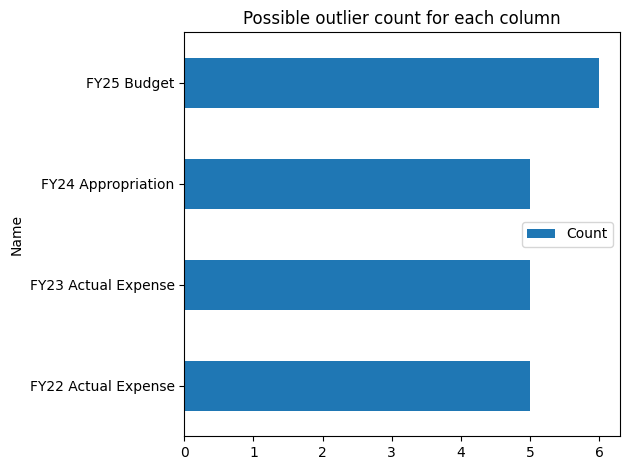

In [115]:
pd.DataFrame(outlierAnalysis,columns=["Name","Count"]).plot(kind="barh",x="Name",y="Count")
plt.title("Possible outlier count for each column")
plt.tight_layout()
plt.savefig("Outlier_Analysis.png", dpi=300, bbox_inches='tight')

# Starting of visual analysis

# Some Insights based on analysis

1. The Bureau of Intelligence & Analysis saw the most decrease in budget for 2025 in comparison to its budget for the annual year 2022.
2. The Bureau of Professional Development	saw the most increase in budget for 2025 in comparison to its budget for the annual year 2022.
3. The 2025 budget allocation saw an increase from all of the previous Financial years.
4. BAT Programmes requirement for equipments have greatly increased.
5. Current Charges & Obligations under the Bureau of Field Services saw a staggering 5000% increase in the FY 2025 Budget in comparison to the 2022 Budget.
6. Equipments and Contractual Services saw a significant increase in budget allocation.
7. Supplies & Materials	under the Police Commissioner's Office had the greatest decrease in Budget for 2025 in comparison to 2022.
8. The Bureau of Intelligence & Analysis budget kept decreasing from 2022 to 2024 and then from 2024 to 2025 it saw a mild increase in budget.
9. The last cell block visualizes the programme which has allocated the minimum/maximum funds on each of the expense category for 2025.
10. The overall trends are increasing while some show fluctuations/decrease in growth sporadically.

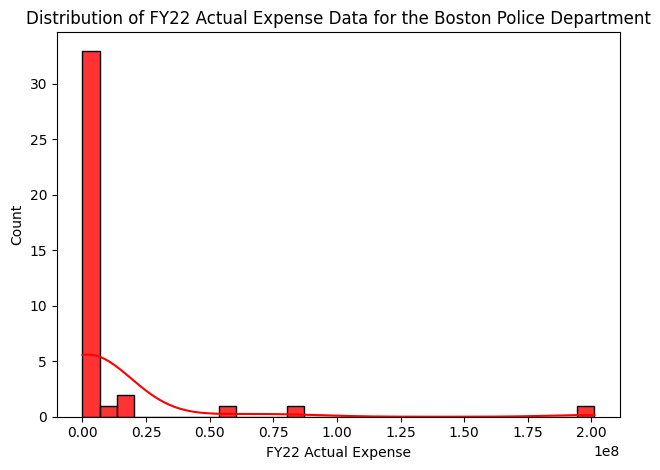

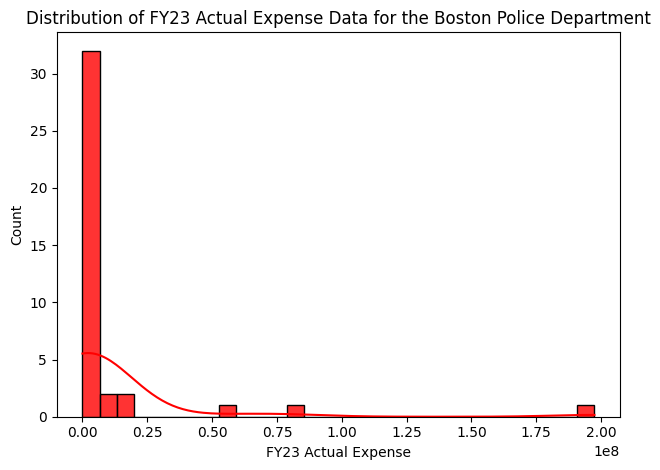

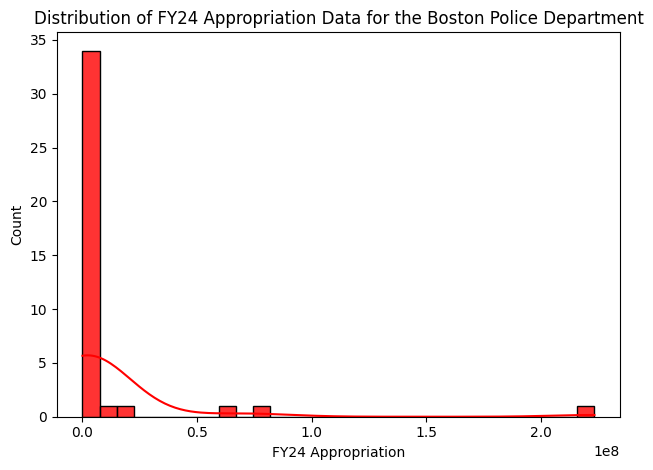

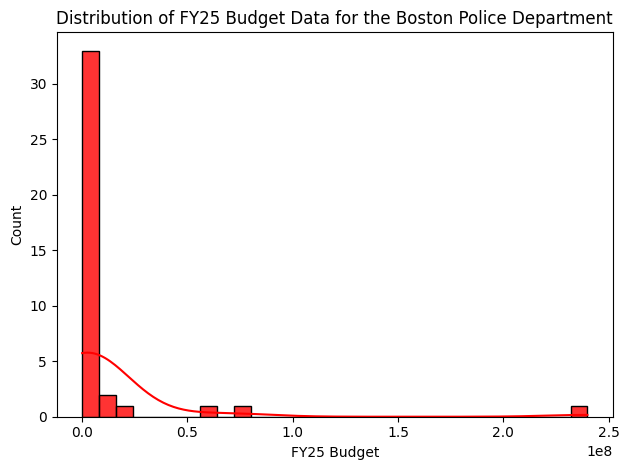

In [86]:
for item in df.columns:
  if df[item].dtype!="object" and item!="_id":
    plt.title(f"Distribution of {item} Data for the Boston Police Department")
    sns.histplot(df[item], bins=30, kde=True, color="red", edgecolor="black", alpha=0.8)
    plt.tight_layout()
    plt.savefig(f"Distribution of {item} data.png", dpi=300, bbox_inches='tight')
    plt.show()
    print("\n\n\n")


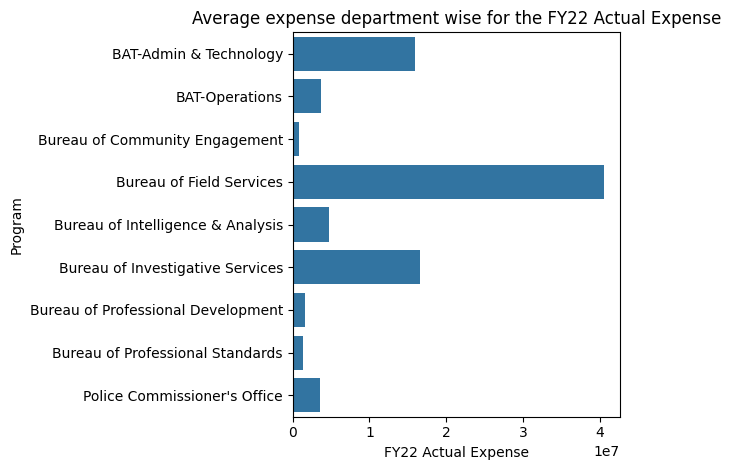

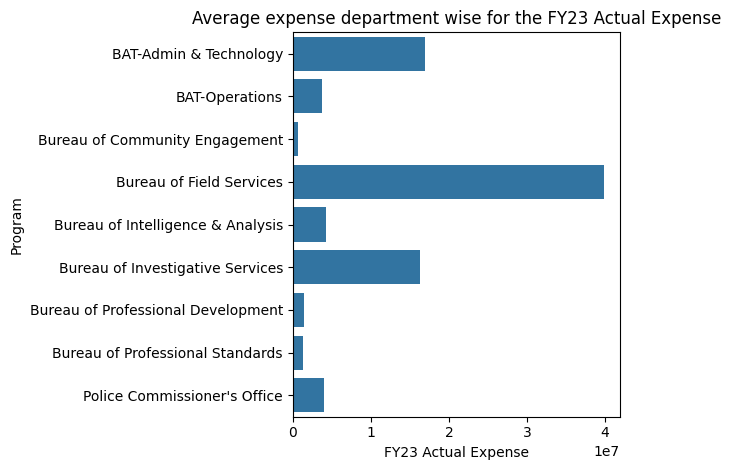

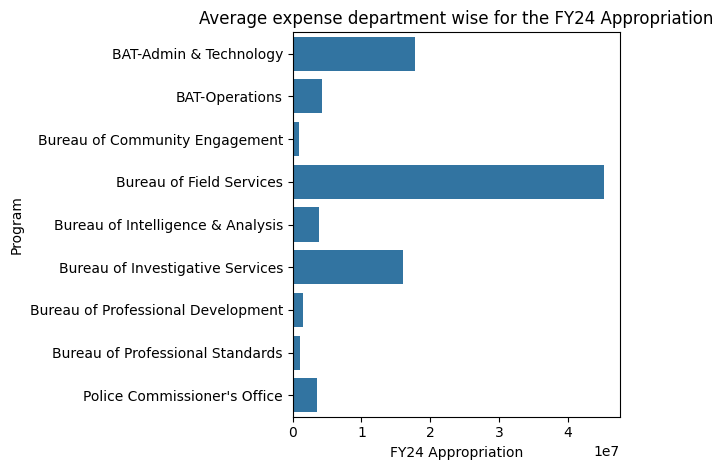

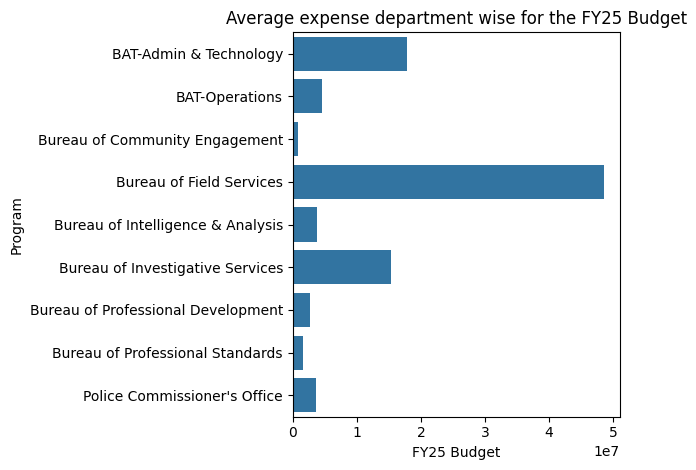

In [ ]:
df_average=df[["Program","FY22 Actual Expense","FY23 Actual Expense","FY24 Appropriation","FY25 Budget"]].groupby("Program").mean()
for item in df_average.columns:
  if df_average[item].dtype!="object" and item!="_id":
    plt.title(f"Average expense department wise for the {item}")
    sns.barplot(x=df_average[item],y=df_average.index,orient="h")
    plt.tight_layout()
    plt.savefig(f"Average_Expense_{item}.png", dpi=300, bbox_inches='tight')
    plt.show()
    print("\n\n\n")


In [ ]:
df.columns

Index(['_id', 'Cabinet', 'Dept', 'Program', 'Expense Category',
       'FY22 Actual Expense', 'FY23 Actual Expense', 'FY24 Appropriation',
       'FY25 Budget'],
      dtype='object')

In [88]:
dfTemp=df[numerical+["Program"]].groupby("Program").mean().drop("_id",axis=1)

In [89]:
dfTemp.shape

(9, 4)

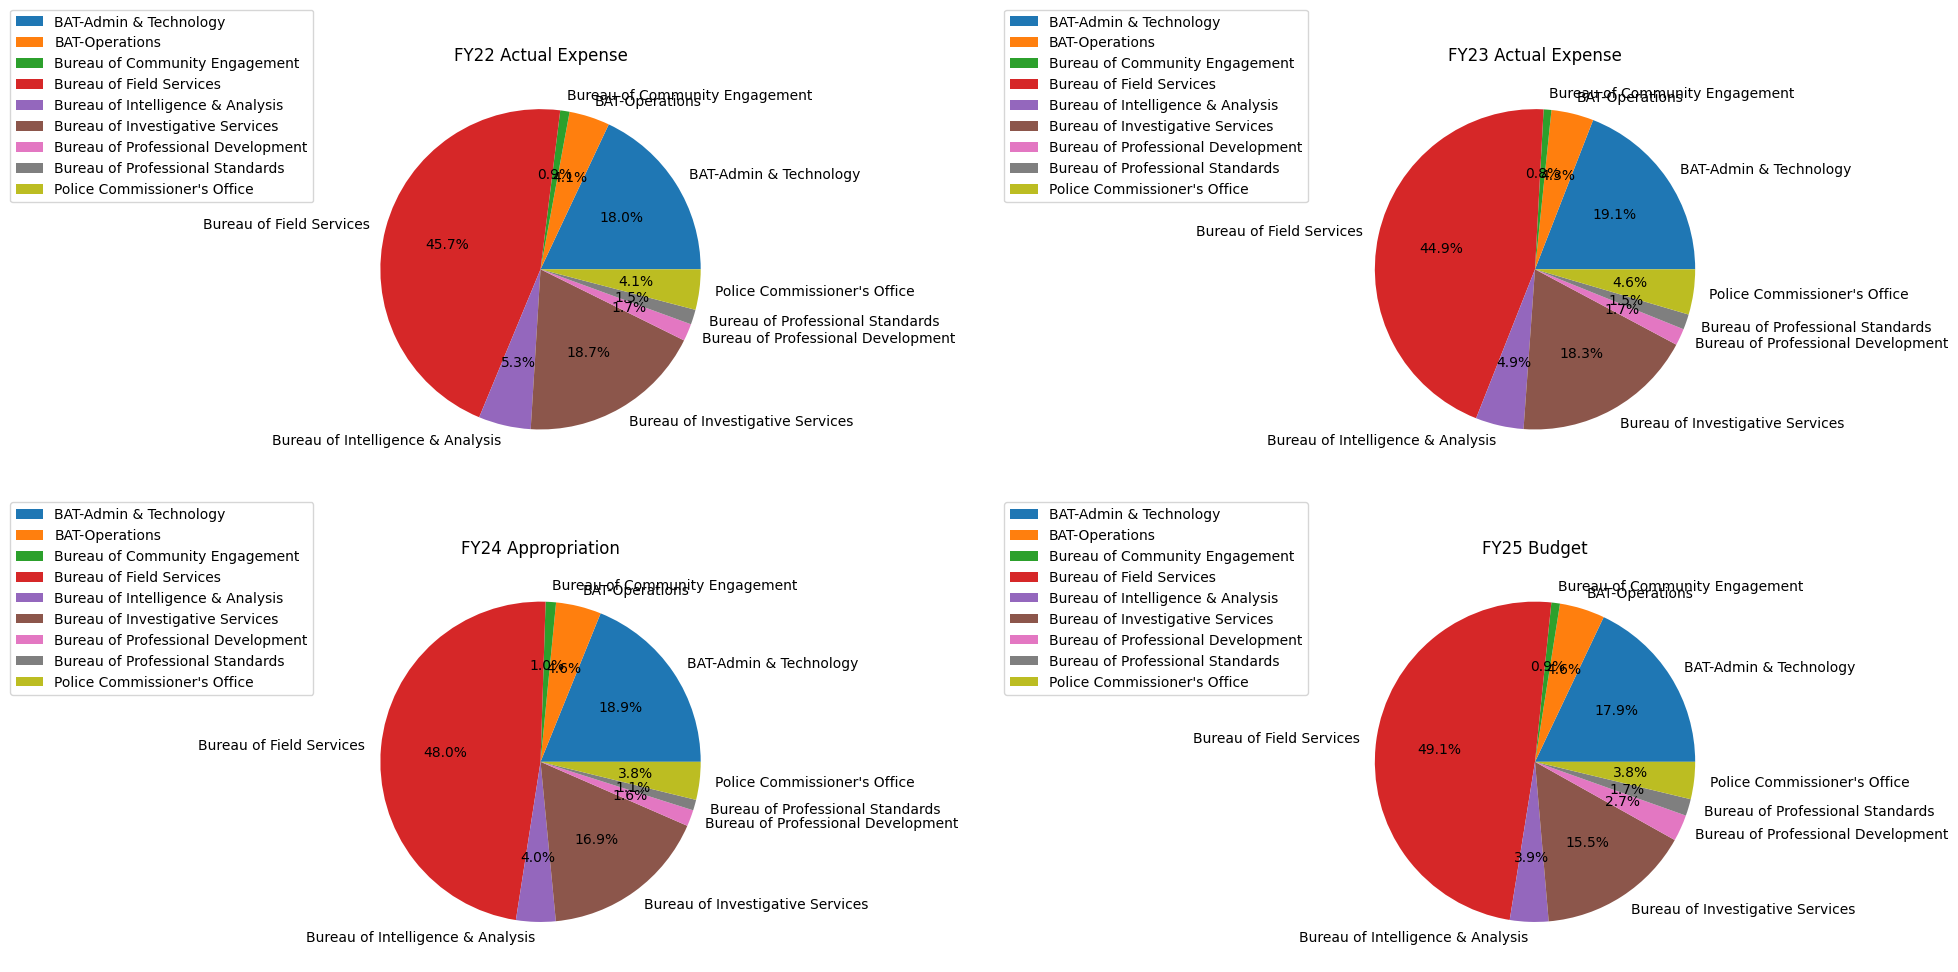

In [92]:
indices=dfTemp.index
fig,ax=plt.subplots(2,2,figsize=(20, 10))
row,column=0,0
for item in dfTemp.columns:
  values=dfTemp[item].tolist()
  ax[row][column].pie(values,labels=indices,autopct='%.1f%%')
  ax[row][column].set_title(item)
  ax[row][column].legend(bbox_to_anchor=(-0.05, 0.65))
  column+=1
  if column==2:
    row+=1
    column=0

plt.tight_layout()
plt.savefig(f"Program wise spending distribution.png", dpi=300, bbox_inches='tight')

In [93]:
# Lets start with analyzing which particular programme within the police department had the greatest increase in spending

dfTemp.head()

differences=[]

for item in indices:
  increase=(dfTemp.loc[item,"FY25 Budget"]-dfTemp.loc[item,"FY24 Appropriation"])/dfTemp.loc[item,"FY24 Appropriation"]
  differences.append([item,increase])


df_2024_2025=pd.DataFrame(differences,columns=["Program","Percentage Inc/Dec in budget (2024-2025)"]).sort_values(by="Percentage Inc/Dec in budget (2024-2025)")

In [94]:
# Lets start with analyzing which particular programme within the police department had the greatest increase in spending

dfTemp.head()

differences=[]

for item in indices:
  increase=(dfTemp.loc[item,"FY25 Budget"]-dfTemp.loc[item,"FY22 Actual Expense"])/dfTemp.loc[item,"FY22 Actual Expense"]
  differences.append([item,increase])


df_2022_2025=pd.DataFrame(differences,columns=["Program","Percentage Inc/Dec in budget (2022-2025)"]).sort_values(by="Percentage Inc/Dec in budget (2022-2025)")

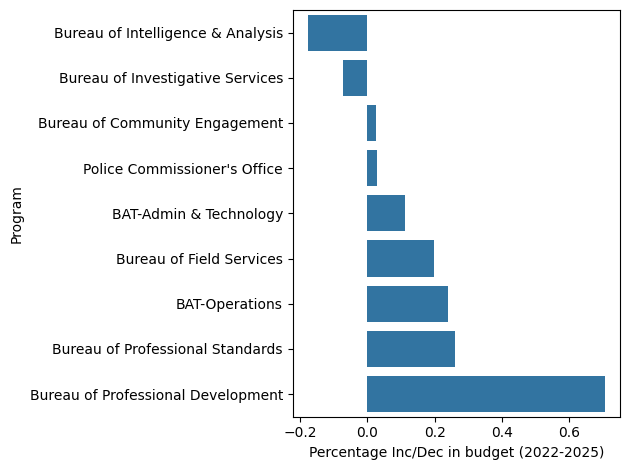

In [95]:
sns.barplot(y=df_2022_2025["Program"],x=df_2022_2025["Percentage Inc/Dec in budget (2022-2025)"])
plt.tight_layout()
plt.savefig("Percentage Increase\Decrease 2022-2025 (Programme Wise).png",dpi=300, bbox_inches='tight')

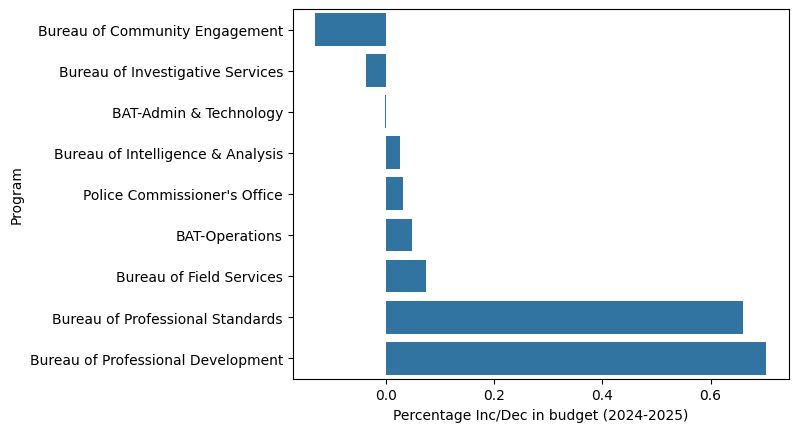

In [96]:
sns.barplot(y=df_2024_2025["Program"],x=df_2024_2025["Percentage Inc/Dec in budget (2024-2025)"])
plt.savefig("Percentage Increase\Decrease 2024-2025 (Programme Wise).png",dpi=300,bbox_inches='tight')

In [97]:
# For each of the Programmes within the Police Department, Which expense category is most expenseive


for item in indices:
  currentProgram=df[df["Program"]==item]
  print(item,"\n\n\n",currentProgram[["Expense Category","FY22 Actual Expense"]].groupby("Expense Category").mean()["FY22 Actual Expense"].sort_values())
  print("\n\n")


BAT-Admin & Technology 


 Expense Category
Equipment                          681979.78
Supplies & Materials               929722.49
Current Charges & Obligations     6187193.20
Contractual Services             15412761.50
Personnel Services               56709476.57
Name: FY22 Actual Expense, dtype: float64



BAT-Operations 


 Expense Category
Current Charges & Obligations     481463.54
Equipment                        2872937.96
Contractual Services             4112156.85
Supplies & Materials             4176912.76
Personnel Services               6549542.93
Name: FY22 Actual Expense, dtype: float64



Bureau of Community Engagement 


 Expense Category
Equipment                            298.20
Current Charges & Obligations       2234.99
Contractual Services                2560.00
Supplies & Materials               33506.67
Personnel Services               4138102.98
Name: FY22 Actual Expense, dtype: float64



Bureau of Field Services 


 Expense Category
Current Charges & Obli

In [98]:

for item in indices:
  currentProgram=df[df["Program"]==item]
  print(item,"\n\n\n",currentProgram[["Expense Category","FY25 Budget"]].groupby("Expense Category").mean()["FY25 Budget"].sort_values())
  print("\n\n")

BAT-Admin & Technology 


 Expense Category
Supplies & Materials               850812.80
Equipment                         1963499.04
Current Charges & Obligations     5280340.00
Contractual Services             20985108.00
Personnel Services               59769081.58
Name: FY25 Budget, dtype: float64



BAT-Operations 


 Expense Category
Current Charges & Obligations     508547.00
Supplies & Materials             4159524.27
Contractual Services             4279102.00
Equipment                        6669203.43
Personnel Services               6954497.59
Name: FY25 Budget, dtype: float64



Bureau of Community Engagement 


 Expense Category
Equipment                          12500.00
Contractual Services               15500.00
Current Charges & Obligations      15500.00
Supplies & Materials               30000.00
Personnel Services               4205142.78
Name: FY25 Budget, dtype: float64



Bureau of Field Services 


 Expense Category
Current Charges & Obligations    8.295000e+04


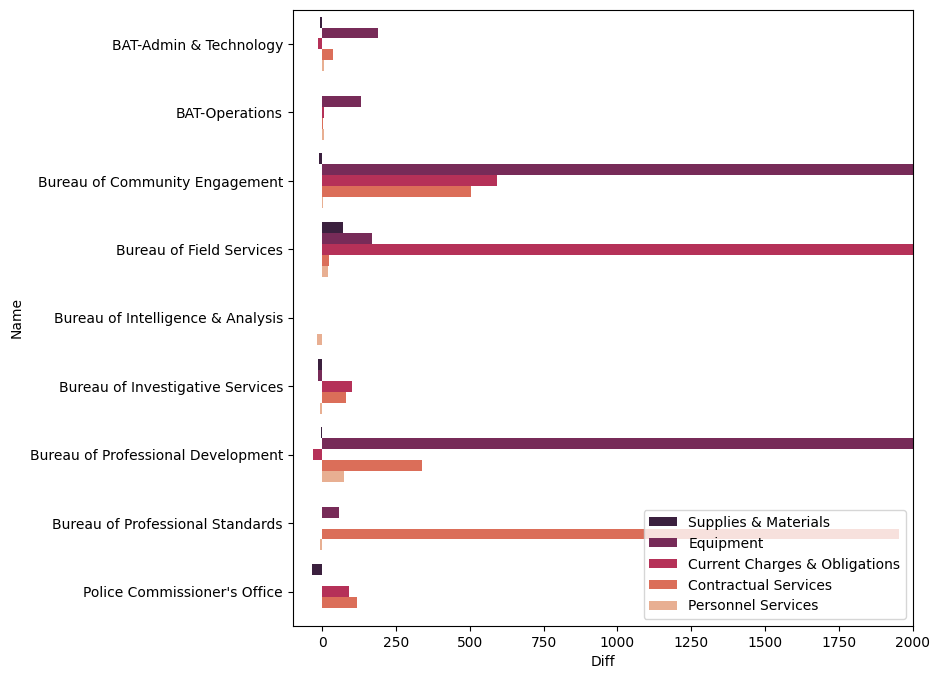

In [99]:
# Lets merge both of them together and see the increase/decrease for each category


stats=[]


for item in indices:
  currentProgram=df[df["Program"]==item]
  df_1=currentProgram[["Expense Category","FY25 Budget"]].groupby("Expense Category").mean()["FY25 Budget"].sort_values()
  df_2=currentProgram[["Expense Category","FY22 Actual Expense"]].groupby("Expense Category").mean()["FY22 Actual Expense"].sort_values()
  df_1=pd.DataFrame(df_1)
  df_2=pd.DataFrame(df_2)
  df_1["Categories"]=df_1.index
  df_2["Categories"]=df_2.index


  df_3=df_1.merge(df_2,on="Categories")

  df_3["Diff"]=(df_3["FY25 Budget"]-df_3["FY22 Actual Expense"])/df_3["FY22 Actual Expense"]
  df_3["Diff"]=df_3["Diff"]*100
  df_3=df_3[["Diff","Categories"]]
  df_3["Name"]=[item]*df_3.shape[0]
  stats.append(df_3)




dfStats=pd.concat([*stats],axis=0)
dfStats.sort_values(by="Diff")


plt.figure(figsize=(8,8))
sns.barplot(data=dfStats, y="Name", x="Diff", hue="Categories", palette="rocket")
plt.xlim(-100,2000)
plt.legend(loc="lower right")
plt.savefig("Expense Category Percentage Difference 2022-2025 (Programme Wise)",dpi=300,bbox_inches='tight')

In [ ]:
dfStats.sort_values(by="Diff")

,Diff,Categories,Name
1,-35.340855,Supplies & Materials,Police Commissioner's Office
0,-31.910783,Current Charges & Obligations,Bureau of Professional Development
0,-17.835655,Personnel Services,Bureau of Intelligence & Analysis
2,-15.538115,Supplies & Materials,Bureau of Investigative Services
2,-14.656940,Current Charges & Obligations,BAT-Admin & Technology
0,-12.949853,Equipment,Bureau of Investigative Services
3,-10.465588,Supplies & Materials,Bureau of Community Engagement
0,-8.487446,Supplies & Materials,BAT-Admin & Technology
3,-8.439572,Personnel Services,Bureau of Professional Standards
4,-7.823927,Personnel Services,Bureau of Investigative Services


In [ ]:
# For each expense category, which programme has been allocated the least funds for 2025

values=[[],[]]
for item in df["Expense Category"].unique().tolist():
  values[0].append(df[df["Expense Category"]==item][["Program","FY25 Budget"]].sort_values(by="FY25 Budget").iloc[0,0])

In [ ]:
# For each expense category, which programme has been allocated the least funds for 2025

for item in df["Expense Category"].unique().tolist():
  values[1].append(df[df["Expense Category"]==item][["Program","FY25 Budget"]].sort_values(by="FY25 Budget").iloc[-1,0])

In [ ]:
columns=df["Expense Category"].unique().tolist()
dfDiff=pd.DataFrame(values,columns=columns)
dfDiff.index=["Dept that spent minimum","Dept that spent maximum"]

In [ ]:
dfDiff.head()

,Personnel Services,Contractual Services,Supplies & Materials,Current Charges & Obligations,Equipment
Dept that spent minimum,Bureau of Intelligence & Analysis,Bureau of Community Engagement,Bureau of Community Engagement,Bureau of Professional Development,Bureau of Professional Standards
Dept that spent maximum,Bureau of Field Services,BAT-Admin & Technology,BAT-Operations,BAT-Admin & Technology,BAT-Operations
